<img style="float: right;" src="../images/meetup_logo.svg" width=200>

# Meetup - Exploratory Data Analysis

<i>Exploring the contents of meetup data.</i>

<u>We'll look at:</u>
1. Events (Sep & Oct 2018)
2. Groups
3. Members

***

### Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import pickle
import json
import time
import datetime
from pprint import pprint
%matplotlib inline

***
### Events

#### Where are events being held in New York City?

We can see that majority of events in NYC are held in Manhattan, tappering off north of Midtown, and with some notable hotpots in Long Island City in Queens and Dumbo in Brooklyn. Not surprising since these are the most popular areas of NYC.

In [3]:
# first, let's get a map of NYC
nyc_map = folium.Map(location=[40.7128, -74.0060],
                    zoom_start = 11,
                    tiles = 'cartodbpositron') # Uses lat then lon. The bigger the zoom number, the closer in you get

In [4]:
# convert json to dataframe
sepoct_events = pd.read_json('monthly_events_2018/sepoct_events_cleaned.json')

In [5]:
sepoct_events.head(1)

,created,description,duration_min,event_url,fee,group,headcount,how_to_find_us,id,maybe_rsvp_count,...,venue_latlon,time_datetime,time_m_d_y,day_of_week,event_hour,event_hour_group,subway_distances,num_close_subways,has_fee,created_to_event_days
0,1535391367000,Join us in person or tune in online! Livestrea...,120,https://www.meetup.com/Build-with-Code-New-Yor...,0.0,"{'join_mode': 'open', 'created': 1484876702000...",0,Please come to second floor/ stream online at ...,254149786,0,...,"[40.723171, -73.997177]",1536100200000,1536019200000,Tuesday,22,"{'closed': 'left', 'closed_right': False, 'len...","[0.0601408266, 0.084601256, 0.1554775319, 0.23...",12,0,8.204086


In [6]:
sepoct_events.group[0]

{'join_mode': 'open',
 'created': 1484876702000,
 'name': 'Build with Code - New York City',
 'group_lon': -73.9899978638,
 'id': 21993357,
 'urlname': 'Build-with-Code-New-York',
 'group_lat': 40.75,
 'who': 'Engineers'}

In [7]:
pprint(sepoct_events.columns)

Index(['created', 'description', 'duration_min', 'event_url', 'fee', 'group',
       'headcount', 'how_to_find_us', 'id', 'maybe_rsvp_count', 'name',
       'photo_url', 'rating', 'rsvp_limit', 'status', 'time', 'updated',
       'utc_offset', 'visibility', 'waitlist_count', 'why', 'yes_rsvp_count',
       'group_is_open', 'group_id', 'has_how_to_find', 'has_rsvp_limit',
       'event_num_words', 'has_photo', 'venue_latlon', 'time_datetime',
       'time_m_d_y', 'day_of_week', 'event_hour', 'event_hour_group',
       'subway_distances', 'num_close_subways', 'has_fee',
       'created_to_event_days'],
      dtype='object')


In [8]:
# turn series into a list and remove any coordinates that contain 0
list_latlon = list(sepoct_events['venue_latlon'])
list_latlon = [l for l in list_latlon if None not in l]
list_latlon = [l for l in list_latlon if 0 not in l]
len(list_latlon)

22388

In [9]:
sepoct_events_latlons = sepoct_events[['venue_latlon', 'name', 'group']]

In [10]:
sepoct_events_latlons['venue_latlon'][0][0]

40.723171

In [11]:
def clean_latlon(latlon_list):
    if None in latlon_list:
        return 'None'
    elif 0 in latlon_list:
        return 'None'
    else:
        return latlon_list

In [12]:
sepoct_events_latlons['venue_latlon'] = sepoct_events_latlons['venue_latlon'].apply(lambda x: clean_latlon(x))

/Users/gracejeong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [13]:
sepoct_events_latlons = sepoct_events_latlons[sepoct_events_latlons['venue_latlon'] != 'None']

In [14]:
sepoct_events_latlons.reset_index(inplace =True)
sepoct_events_latlons.drop(columns = ['index'], inplace =True)

In [15]:
sepoct_events_latlons.head(1)

,venue_latlon,name,group
0,"[40.723171, -73.997177]","JavaScript The Easier Parts: Objects, Function...","{'join_mode': 'open', 'created': 1484876702000..."


In [16]:
# adding event markers to map
for i in range(0,len(sepoct_events_latlons[:2000])):
    folium.Marker([sepoct_events_latlons['venue_latlon'][i][0], sepoct_events_latlons['venue_latlon'][i][1]], 
                  popup=f"Event: {sepoct_events_latlons.iloc[i]['name']}\nGroup: {sepoct_events_latlons.iloc[i]['group']['name']}").add_to(nyc_map)

In [17]:
nyc_map

#### How many events were held over the course of the month?

There are a spike in the number of events held in the middle of the month. 

In [18]:
# let's first change the time to a datetime datatype
sepoct_events['time'] = pd.to_datetime(sepoct_events['time'], unit='ms')
sepoct_events.dtypes

created                           int64
description                      object
duration_min                      int64
event_url                        object
fee                             float64
group                            object
headcount                         int64
how_to_find_us                   object
id                               object
maybe_rsvp_count                  int64
name                             object
photo_url                        object
rating                           object
rsvp_limit                        int64
status                           object
time                     datetime64[ns]
updated                           int64
utc_offset                        int64
visibility                       object
waitlist_count                    int64
why                              object
yes_rsvp_count                    int64
group_is_open                     int64
group_id                          int64
has_how_to_find                   int64


In [19]:
# checking to make sure the datatime converted correctly
sepoct_events['time'][0]

Timestamp('2018-09-04 22:30:00')

In [20]:
sepoct_events['time_m_d_y'] = pd.to_datetime(sepoct_events['time_m_d_y'], unit = 'ms')
sepoct_events['time_m_d_y'][0]

Timestamp('2018-09-04 00:00:00')

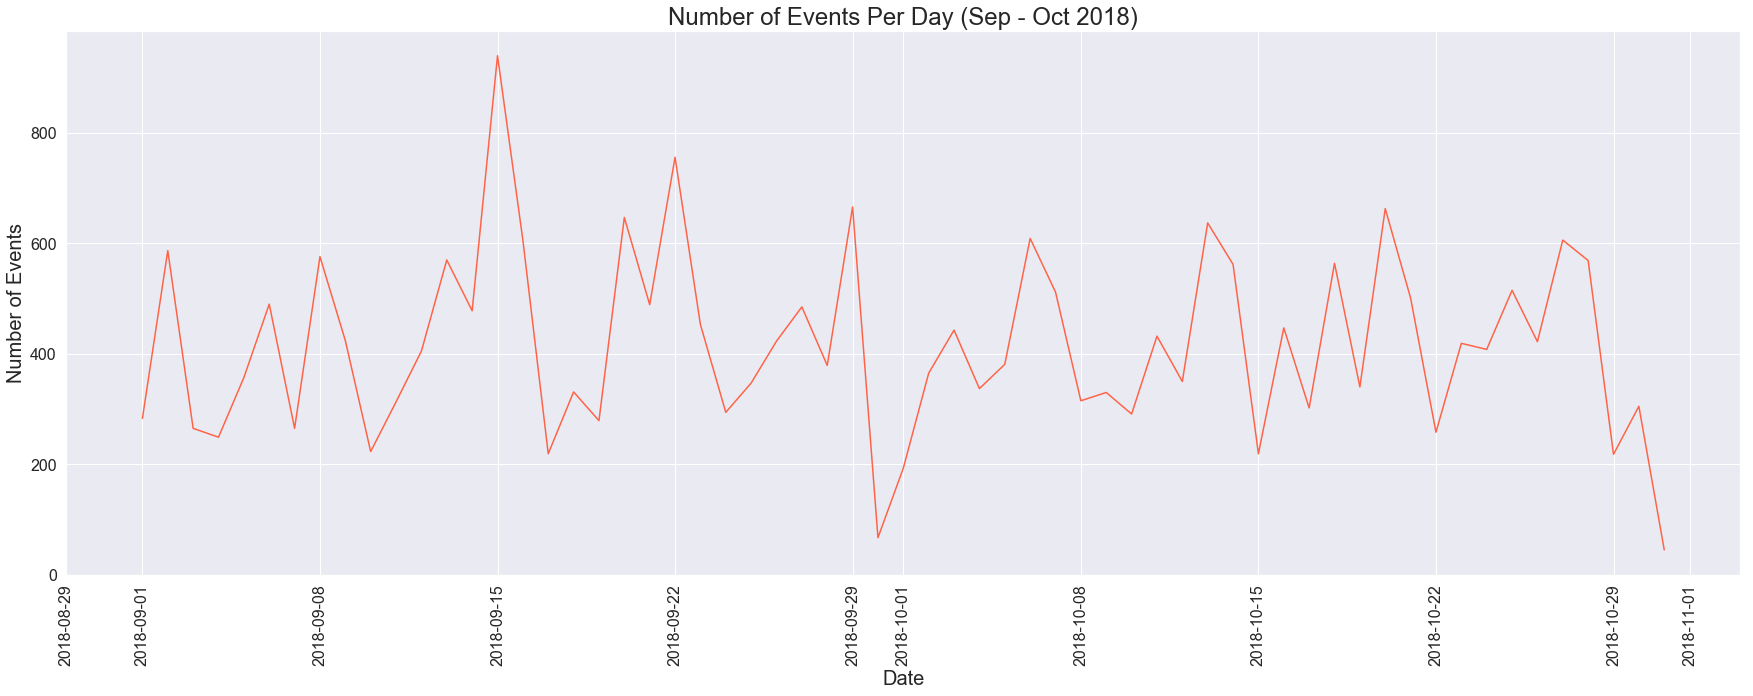

In [21]:
sns.set(style='darkgrid')
x = sepoct_events['time_m_d_y'].value_counts().sort_index().index
y = sepoct_events['time_m_d_y'].value_counts().sort_index()
plt.figure(figsize=(30,10)) 
l = sns.lineplot(x=x, y=y, color = 'tomato')
plt.title("Number of Events Per Day (Sep - Oct 2018)", fontsize = 24)
plt.xticks(rotation=90)
l.set_xlabel("Date", fontsize = 20)
l.set_ylabel("Number of Events", fontsize = 20)
l.tick_params(axis = 'both', labelsize = 16)

In [22]:
sepoct_events['month'] = sepoct_events['time_m_d_y'].apply(lambda x: x.month)

Text(0.5, 1.0, 'Number of Events Each Month')

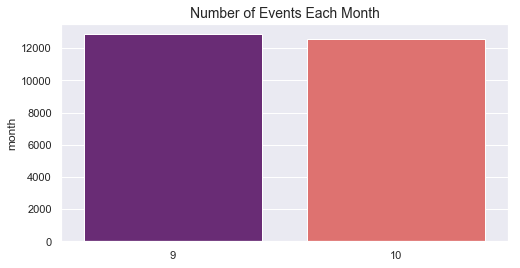

In [23]:
plt.figure(figsize = (8,4))
sns.barplot(x = sepoct_events['month'].value_counts().index, y =sepoct_events['month'].value_counts(), palette = 'magma')
plt.title('Number of Events Each Month', fontsize=14)

In [24]:
day_counts = sepoct_events['day_of_week'].value_counts().to_frame()

In [25]:
day_counts = day_counts.reindex(index = ['Sunday','Monday','Tuesday','Wednesday', 'Thursday','Friday','Saturday'])

In [26]:
day_value_counts = day_counts.reindex(index = ['Sunday','Monday','Tuesday','Wednesday', 'Thursday','Friday','Saturday'])

In [27]:
day_value_counts

,day_of_week
Sunday,4281
Monday,2204
Tuesday,3106
Wednesday,2953
Thursday,4040
Friday,3104
Saturday,5736


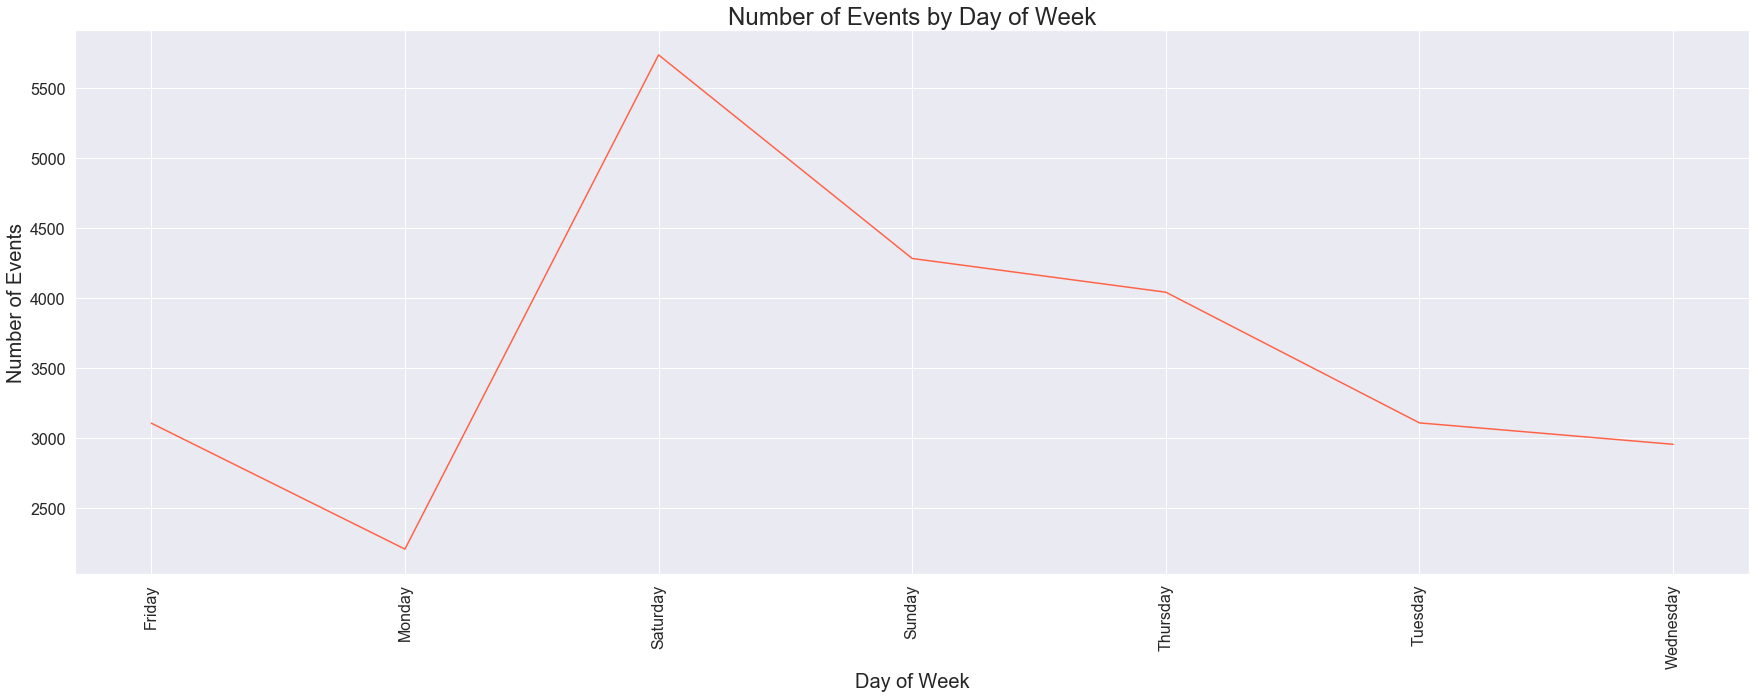

In [30]:
sns.set(style='darkgrid')
x = [str(i) for i in day_value_counts.index]
y = day_value_counts['day_of_week']
plt.figure(figsize=(30,10)) 
l = sns.lineplot(x=x, y=y, color = 'tomato')
plt.title("Number of Events by Day of Week", fontsize = 24)
plt.xticks(rotation=90)
l.set_xlabel("Day of Week", fontsize = 20)
l.set_ylabel("Number of Events", fontsize = 20)
l.tick_params(axis = 'both', labelsize = 16)

In [31]:
sep18_events.columns

NameError: name 'sep18_events' is not defined

In [32]:
se

NameError: name 'se' is not defined

***
### Groups

#### What types of groups are in NYC?

There are 34 categories of groups. Tech, career/business, and socializing are the most popular categories (i.e. most number of groups). Paranormal, None and cars/motorcycles are the least popular categories in NYC.

In [33]:
# getting back all_events:
df_groups = pd.read_csv('all_groups_cleaned.csv', index_col = 0)
df_groups.head()

,created,description,group_id,join_mode,lat,link,localized_country_name,localized_location,lon,members,name,state,status,urlname,visibility,who,category_name,organizer_id,yrs_since_created,created_date
0,1484876702000,Build with Code hosts free weekly JavaScript a...,21993357,open,40.75,https://www.meetup.com/Build-with-Code-New-York/,USA,"New York, NY",-73.99,8050,Build with Code - New York City,NY,active,Build-with-Code-New-York,public,Engineers,tech,218119162,2.276969,01/20/2017 01:45:02
1,1550615516000,The TechDay New York team invites you to join ...,31207091,open,40.75,https://www.meetup.com/TechDayHQ/,USA,"New York, NY",-73.99,1361,TechDay Meetup,NY,active,TechDayHQ,public,Members,career-business,263284450,0.192405,02/19/2019 22:31:56
2,1047953152000,The NYC NoSQL NewSQL Group (formerly known a...,107592,open,40.75,https://www.meetup.com/mysqlnyc/,USA,"New York, NY",-73.99,24226,"🔥 SQL NYC, The NoSQL & NewSQL Database Big Dat...",NY,active,mysqlnyc,public,Data Enthusiasts,tech,6618661,16.131724,03/18/2003 02:05:52
3,1548684384000,The Awesome Events Meetup Group is the real-li...,31031999,open,40.78,https://www.meetup.com/awesome-events/,USA,"New York, NY",-73.96,1694,Awesome Events,NY,active,awesome-events,public,Awesome People,outdoors-adventure,236287112,0.253641,01/28/2019 14:06:24
4,1321563802000,"Data Driven NYC (organized by FirstMark), is a...",2829432,approval,40.76,https://www.meetup.com/DataDrivenNYC/,USA,"New York, NY",-73.97,17382,Data Driven NYC (a FirstMark Event),NY,active,DataDrivenNYC,public,Members,tech,2369792,7.455587,11/17/2011 21:03:22


In [34]:
print(f"Types of categories: {df_groups.category_name.unique()}")
print("\n")
print(f"Number of categories: {len(df_groups.category_name.unique())}")

Types of categories: ['tech' 'career-business' 'outdoors-adventure' 'language' 'arts-culture'
 'lgbt' 'fitness' 'socializing' 'support' 'sports-recreation'
 'photography' 'food-drink' 'writing' 'sci-fi-fantasy' 'games'
 'new-age-spirituality' 'education-learning' 'health-wellbeing' 'dancing'
 'lifestyle' 'cars-motorcycles' 'religion-beliefs' 'hobbies-crafts'
 'community-environment' 'music' 'parents-family' 'government-politics'
 'movies-film' 'singles' 'fashion-beauty' 'book-clubs' 'pets-animals'
 'paranormal' 'None']


Number of categories: 34


In [35]:
len(df_groups[df_groups.category_name == 'paranormal'])

5

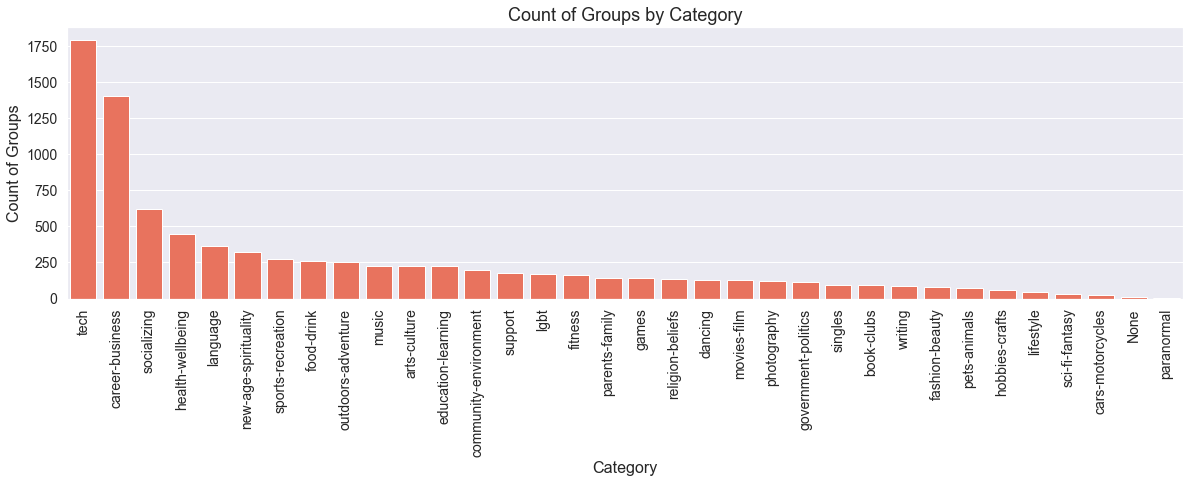

In [36]:
sns.set(style="darkgrid")
plt.figure(figsize=(20,5)) 
plt.title("Count of Groups by Category", fontsize = 18)
plt.xticks(rotation=90)
c = sns.countplot(df_groups.category_name, color = 'tomato', order = df_groups.category_name.value_counts().index)
c.set_xlabel("Category", fontsize = 16)
c.set_ylabel("Count of Groups", fontsize = 16)
c.tick_params(axis = 'both', labelsize = 14)

#### What is the range of memberships in each category?

For most categories, there are a lot of outliers, indicating that perhaps within each category, there are only a handful of groups that are most popular and contain the most membership.

In [47]:
df_groups.columns

Index(['created', 'description', 'group_id', 'join_mode', 'lat', 'link',
       'localized_country_name', 'localized_location', 'lon', 'members',
       'name', 'state', 'status', 'urlname', 'visibility', 'who',
       'category_name', 'organizer_id', 'yrs_since_created', 'created_date'],
      dtype='object')

In [51]:
df_groups.members.describe

<bound method NDFrame.describe of 0        8050
1        1361
2       24226
3        1694
4       17382
5        4629
6       37100
7       10554
8        9342
9       11425
10       6248
11       3947
12      18925
13       2903
14      19050
15      12207
16      11802
17       5939
18        959
19      13903
20       4883
21       8806
22      12295
23      14395
24      11591
25      13314
26       5874
27      22941
28       1659
29       3002
        ...  
8602      831
8603        9
8604      487
8605      295
8606     2652
8607      151
8608      537
8609      221
8610       44
8611      138
8612      148
8613       50
8614       63
8615      135
8616      394
8617      414
8618      281
8619     4698
8620     2485
8621      130
8622       71
8623       66
8624       25
8625      322
8626      858
8627      431
8628     1883
8629        1
8630     2023
8631      236
Name: members, Length: 8632, dtype: int64>

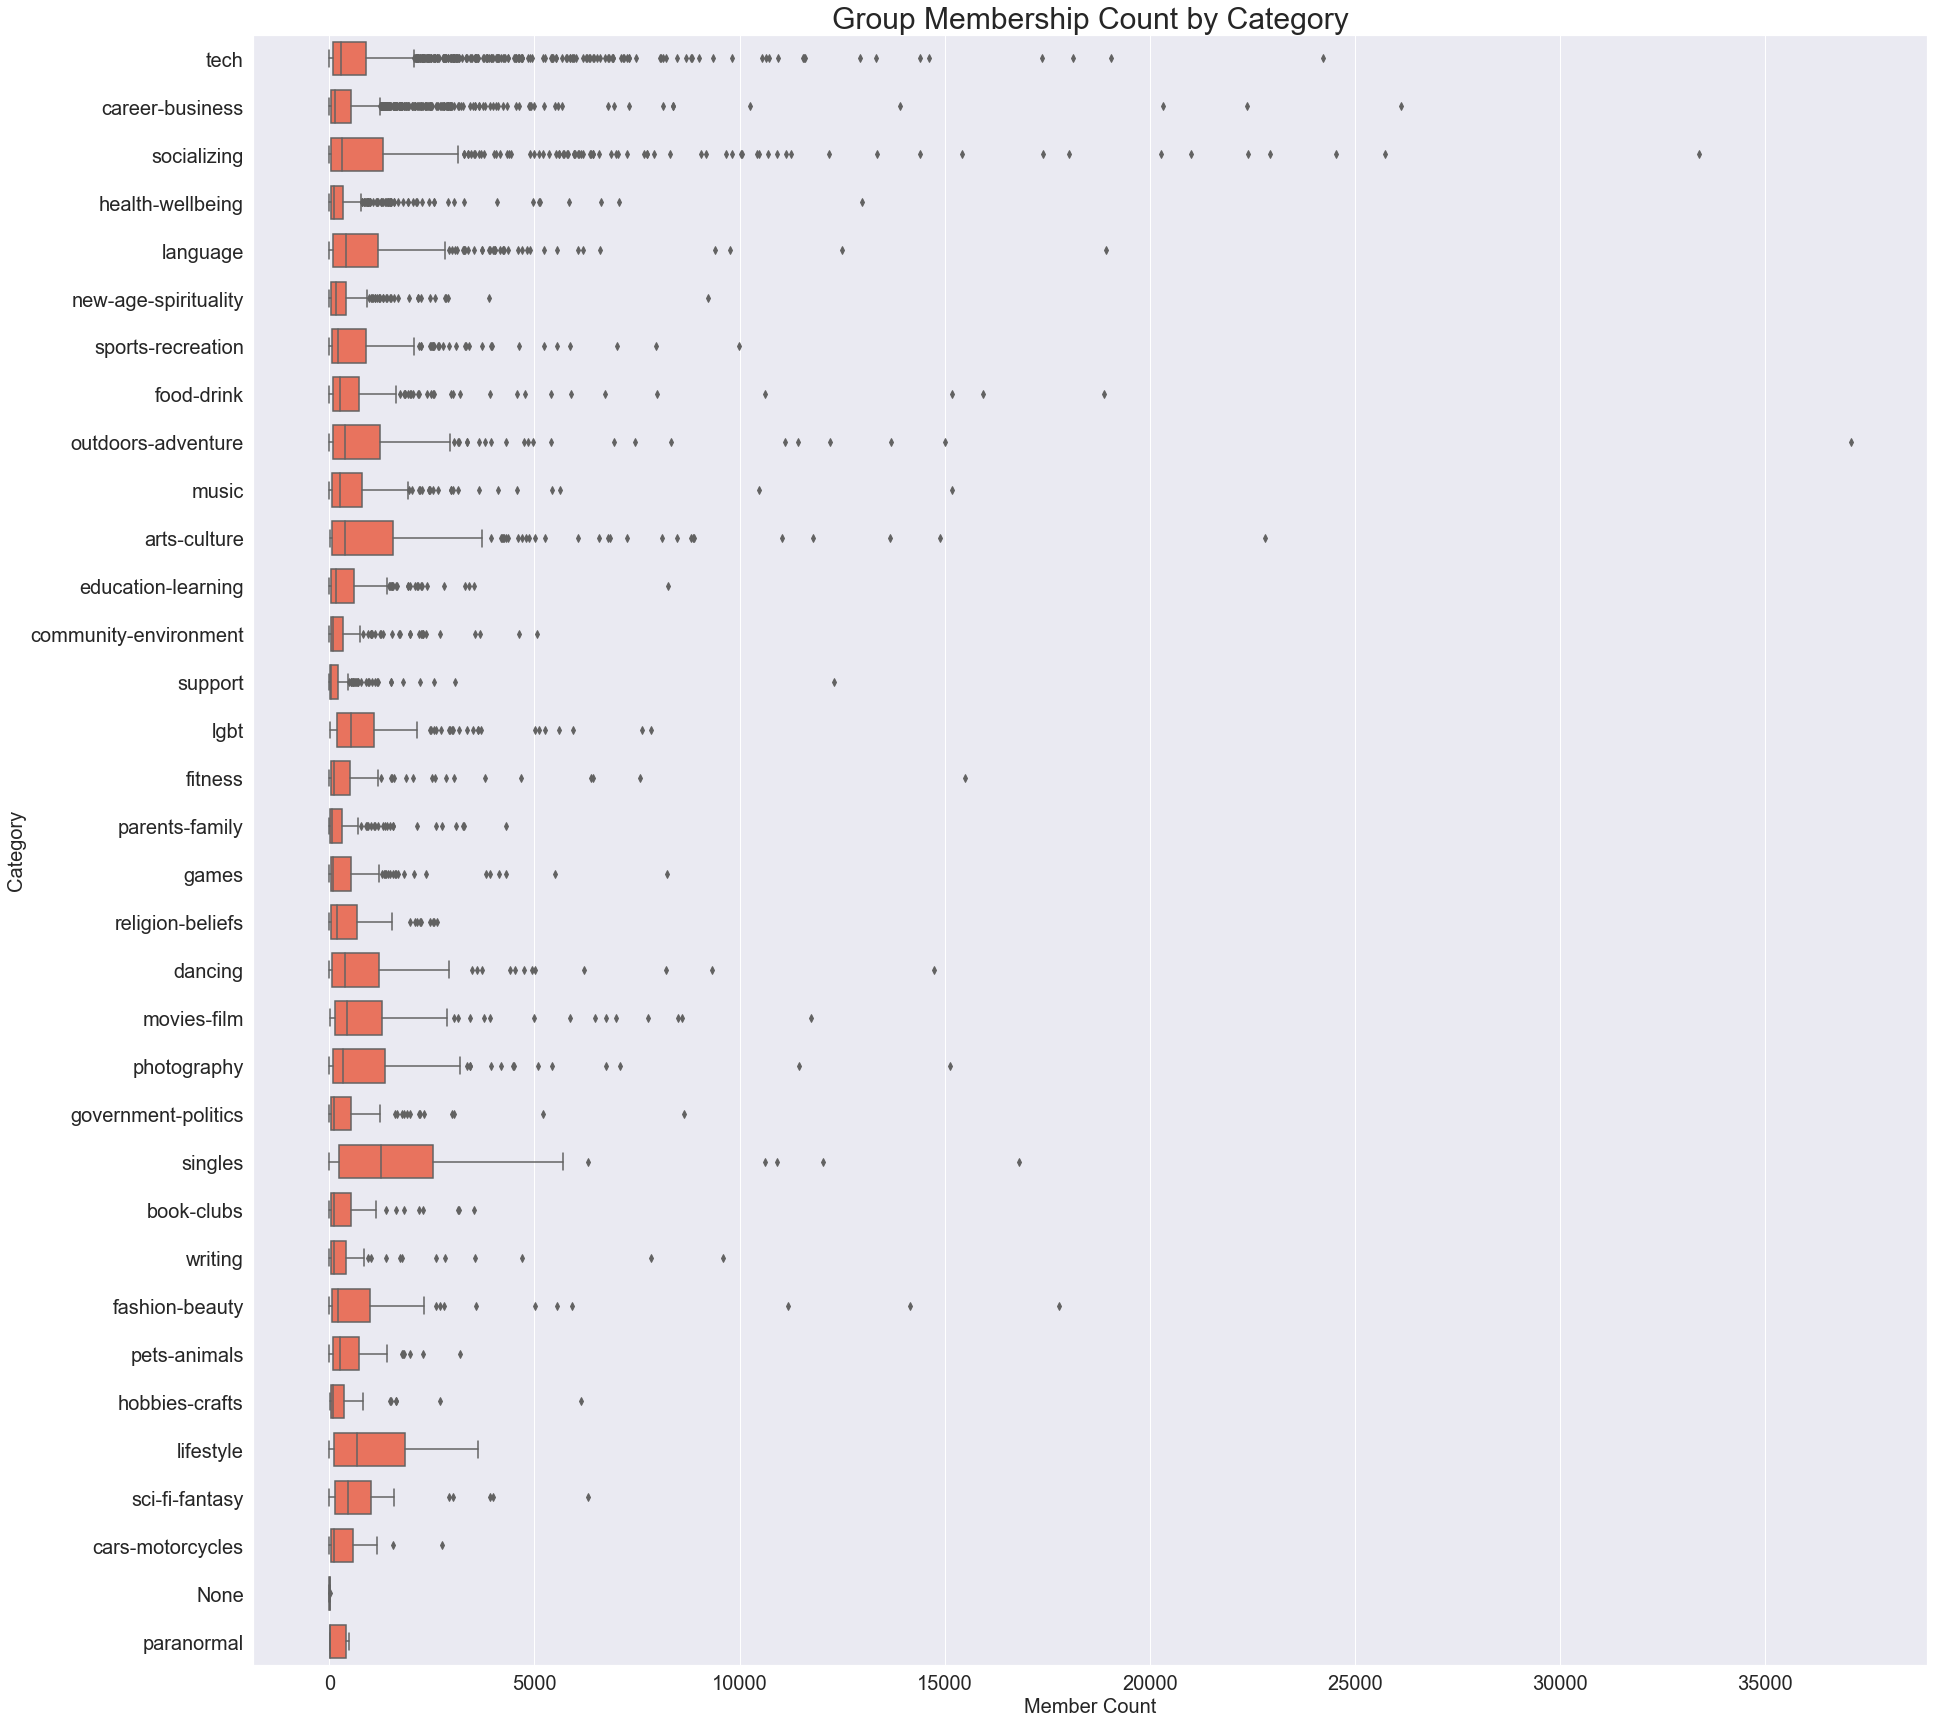

In [37]:
sns.set(style="darkgrid")
plt.figure(figsize=(30,30)) 
plt.title("Group Membership Count by Category", fontsize = 30)
bplot = sns.boxplot(y='category_name', x='members', 
                 data=df_groups, 
                 width=0.7,
                 color = 'tomato',
                 order = df_groups.category_name.value_counts().index,
                 orient = 'h')
bplot.set_xlabel("Member Count", fontsize = 20)
bplot.set_ylabel("Category", fontsize = 20)
bplot.tick_params(axis = 'both', labelsize = 20)

#### How long have groups been around by category?
Meetup was founded in June 2002, about 17 years ago today. There are a handful of groups that are still around today that were created back in the early days of meetup. A majority of groups however are between 0-8 years old as we can see by the interquartile range of each category below.

Some notable mentions: 
- <b>book-club</b> groups tend to be shorter lived
- <b>pets-animals</b> and <b>religion-beliefs</b> groups tend to stick around for longer

In [51]:
df_groups.columns

Index(['created', 'description', 'group_id', 'join_mode', 'lat', 'link',
       'localized_country_name', 'localized_location', 'lon', 'members',
       'name', 'state', 'status', 'urlname', 'visibility', 'who',
       'category_name', 'organizer_id', 'yrs_since_created', 'created_date'],
      dtype='object')

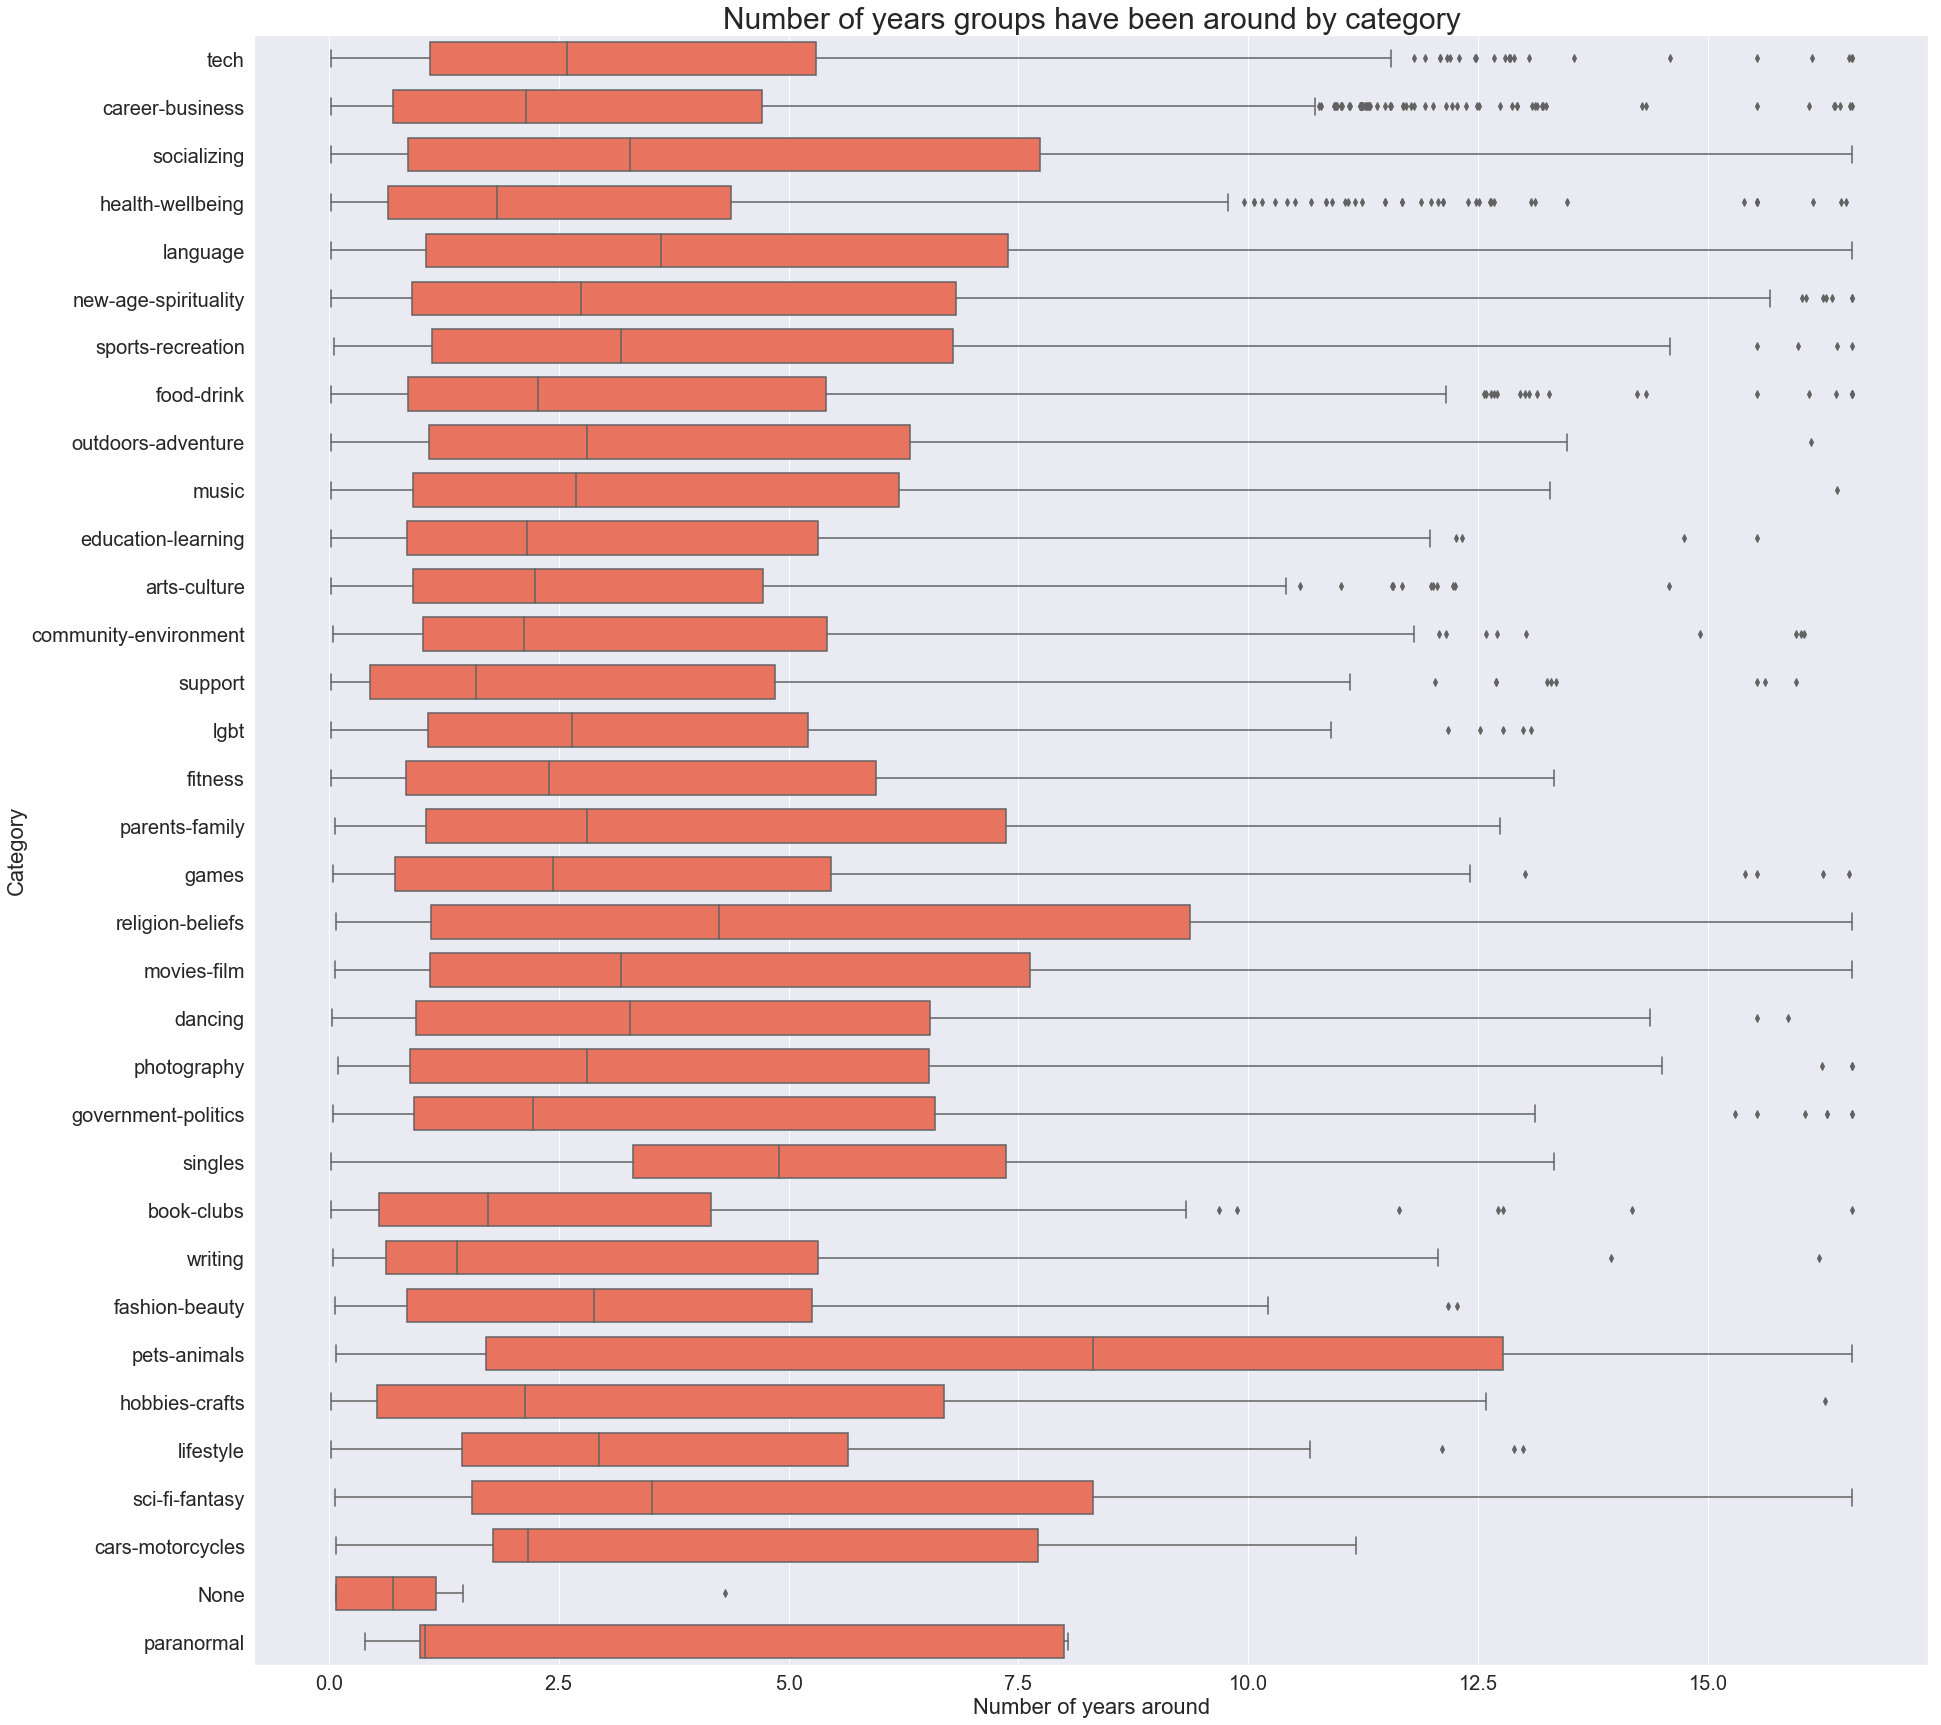

In [52]:
sns.set(style="darkgrid")
plt.figure(figsize=(30,30)) 
plt.title("Number of years groups have been around by category", fontsize = 30)
bplot = sns.boxplot(y='category_name', x='yrs_since_created', 
                 data=df_groups, 
                 width=0.7,
                 color = 'tomato',
                 order = df_groups.category_name.value_counts().index,
                 orient = 'h')
bplot.set_xlabel("Number of years around", fontsize = 22)
bplot.set_ylabel("Category", fontsize = 22)
bplot.tick_params(axis = 'both', labelsize = 20)

#### Which groups tend to host the most events?

Socializing and Singles group categories had the highest range of events held in Sep-Oct. There were a number of outliers in socializing category likely reflective of the fact that some of these groups have been around for the longest (as shown in the graph above).

In [53]:
# merge the events and group dataframes
num_events= pd.DataFrame(sepoct_events['group_id'].value_counts()).reset_index()

In [54]:
num_events.head()

,index,group_id
0,1414748,190
1,9608102,165
2,24480154,160
3,344877,155
4,1338658,149


In [55]:
num_events.rename(columns ={'group_id':'num_events', 'index':'group_id'}, inplace = True)

In [56]:
num_events.head()

,group_id,num_events
0,1414748,190
1,9608102,165
2,24480154,160
3,344877,155
4,1338658,149


In [57]:
num_events.drop_duplicates(subset='group_id', inplace=True)

In [58]:
num_events_merged = pd.merge(num_events, df_groups, how='left', on= 'group_id')

In [59]:
num_events_merged.columns

Index(['group_id', 'num_events', 'created', 'description', 'join_mode', 'lat',
       'link', 'localized_country_name', 'localized_location', 'lon',
       'members', 'name', 'state', 'status', 'urlname', 'visibility', 'who',
       'category_name', 'organizer_id', 'yrs_since_created', 'created_date'],
      dtype='object')

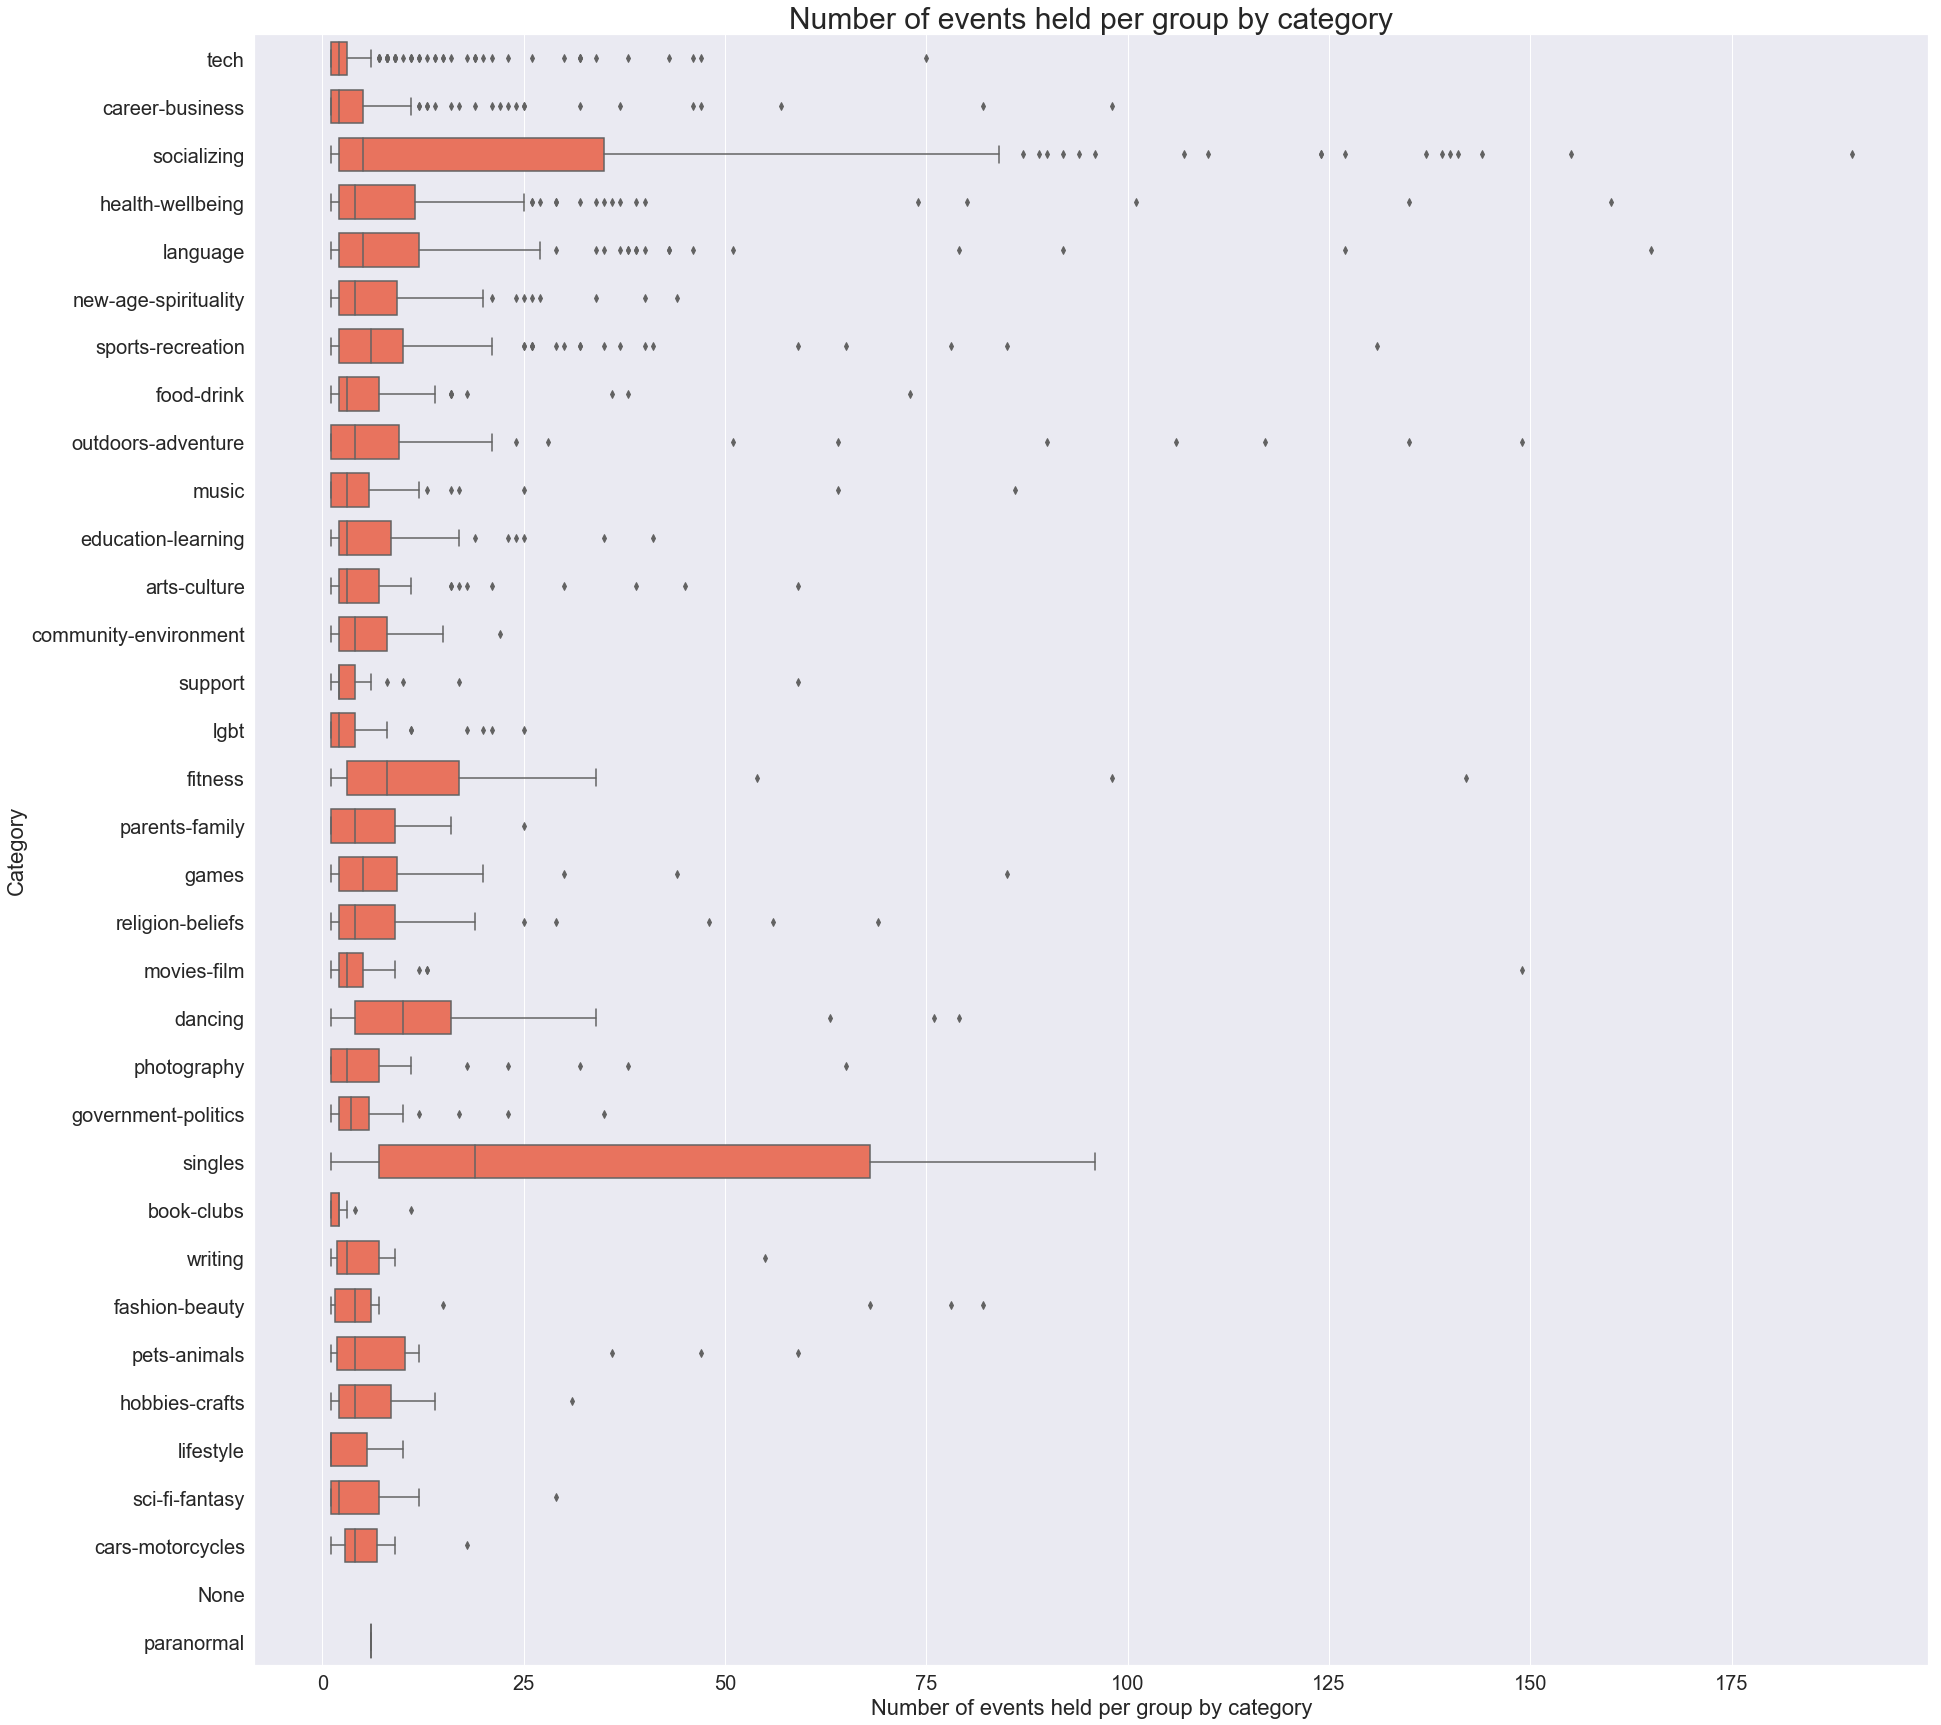

In [60]:
sns.set(style="darkgrid")
plt.figure(figsize=(30,30)) 
plt.title("Number of events held per group by category", fontsize = 30)
bplot = sns.boxplot(y='category_name', x='num_events', 
                 data=num_events_merged, 
                 width=0.7,
                 color = 'tomato',
                 order = df_groups.category_name.value_counts().index,
                 orient = 'h')
bplot.set_xlabel("Number of events held per group by category", fontsize = 22)
bplot.set_ylabel("Category", fontsize = 22)
bplot.tick_params(axis = 'both', labelsize = 20)

In [105]:
sepoct_events['yes_rsvp_count'].describe()

count    25424.000000
mean        12.838302
std         22.095182
min          0.000000
25%          1.000000
50%          4.000000
75%         21.000000
max        592.000000
Name: yes_rsvp_count, dtype: float64

(array([2.462e+04, 6.470e+02, 1.070e+02, 3.400e+01, 8.000e+00, 2.000e+00,
        3.000e+00, 1.000e+00, 0.000e+00, 2.000e+00]),
 array([  0. ,  59.2, 118.4, 177.6, 236.8, 296. , 355.2, 414.4, 473.6,
        532.8, 592. ]),
 <a list of 10 Patch objects>)

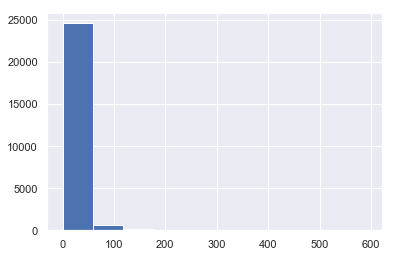

In [106]:
plt.hist(sepoct_events['yes_rsvp_count'])

(array([12975.,  3059.,  1604.,   767.,  1142.,  3688.,   406.,   181.,
          165.,    99.,   137.,   114.,    72.,    50.,    49.,    44.,
           46.,    33.,    35.,   124.]),
 array([  1,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100]),
 <a list of 20 Patch objects>)

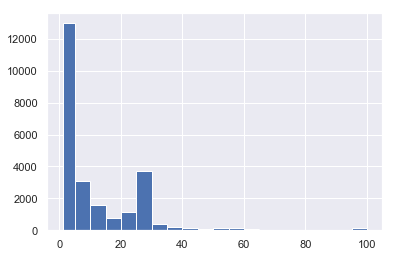

In [138]:
plt.hist(sepoct_events['yes_rsvp_count'], bins= [1,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100])

In [111]:
len(sepoct_events)

25424

In [124]:
len(sepoct_events[sepoct_events['yes_rsvp_count'] <100]) - 283

24685

In [110]:
len(sepoct_events[sepoct_events['yes_rsvp_count'] >100])

351

In [116]:
len(sepoct_events[sepoct_events['yes_rsvp_count'] == 0])

283

In [121]:
bins = list(range(0,600,25))

Text(0, 0.5, 'Count of Events')

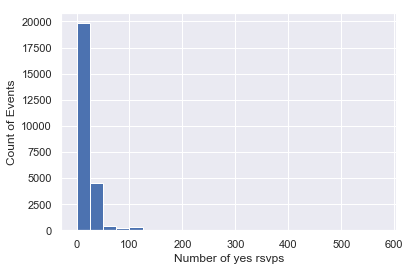

In [130]:
plt.hist(sepoct_events['yes_rsvp_count'], bins= bins)
plt.xlabel("Number of yes rsvps")
plt.ylabel('Count of Events')

In [87]:
with open('unique_members.pkl', 'rb') as f:
    unique_members = pickle.load(f)

In [104]:
len(unique_members)

484779